# 1회차 실습 과제: 통계적 사고와 기술통계

## 문제 항목

| 문제 | 주제 | 사용 데이터 |
|------|------|-----------|
| 문제 1 | 중심 경향 측도 (평균, 중앙값, 최빈값, 절사평균, 가중평균) | EMISSIONS |
| 문제 2 | 산포도 측도 (분산, 표준편차, 범위, IQR, 변동계수, 이상치 탐지) | COMB (L/100 km), ENGINE SIZE |
| 문제 3 | 분포의 형태 (왜도, 첨도) | 수치형 변수 전체 |
| 도전 과제 | 라이브러리 없이 기술통계 직접 구현 | 순수 Python |

---

## 데이터 설명

**파일명**: `차량_연비_데이터(2000-2022).csv`

2000~2022년 차량 연비 데이터

| 컬럼 | 설명 |
|------|------|
| YEAR | 차량 제조 연도 |
| MAKE | 제조사 (예: 현대, BMW) |
| MODEL | 차량 모델명 (예: Sonata, Model S) |
| VEHICLE CLASS | 차량 분류 (예: SUV, 세단). 4WD/4X4: 사륜구동, AWD: 전륜구동, FFV: 유연연료 차량 |
| ENGINE SIZE | 엔진 배기량 (단위: 리터) |
| CYLINDERS | 실린더 개수. 출력과 연비에 영향 |
| TRANSMISSION | 변속기 종류. A: 자동, M: 수동, AS: 자동 선택변속기, AV: 무단변속기. 숫자는 기어 수(3~10단) |
| FUEL | 연료 종류. X: 일반 가솔린, Z: 고급 가솔린, D: 디젤, E: 에탄올(E85), N: 천연가스 |
| CITY (L/100 km) | 도심 연비 (연료 소비량) |
| HWY (L/100 km) | 고속도로 연비 (연료 소비량) |
| COMB (L/100 km) | 복합 연비. 도심(55%) + 고속도로(45%) 종합 |
| COMB (mpg) | 복합 연비 (단위: MPG) |
| EMISSIONS | CO2 배출량 (단위: g/km) |

---

In [38]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import platform
import os

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("="*60)
print("1회차 실습 과제: 통계적 사고와 기술통계")
print("="*60)


1회차 실습 과제: 통계적 사고와 기술통계


In [39]:
# 데이터 로드
DATA_PATH = os.path.join('data', '차량_연비_데이터(20022022).csv')
df = pd.read_csv(DATA_PATH)

# 데이터 기본 검증
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             22556 non-null  int64  
 1   MAKE             22556 non-null  object 
 2   MODEL            22556 non-null  object 
 3   VEHICLE CLASS    22556 non-null  object 
 4   ENGINE SIZE      22556 non-null  float64
 5   CYLINDERS        22556 non-null  int64  
 6   TRANSMISSION     22556 non-null  object 
 7   FUEL             22556 non-null  object 
 8   CITY (L/100 km)  22556 non-null  float64
 9   HWY (L/100 km)   22556 non-null  float64
 10  COMB (L/100 km)  22556 non-null  float64
 11  COMB (mpg)       22556 non-null  int64  
 12  EMISSIONS        22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [40]:
# 데이터 전처리
df['VEHICLE CLASS'] = (df['VEHICLE CLASS']
                       .str.upper()
                       .str.replace(':', ' -')
                       .str.replace('  ', ' ')
                       .str.strip())

# 범주 값별 빈도 확인
df['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
COMPACT                     3127
MID-SIZE                    2960
SUV                         2640
PICKUP TRUCK - STANDARD     2204
SUBCOMPACT                  2010
SUV - SMALL                 1756
FULL-SIZE                   1503
TWO-SEATER                  1312
SUV - STANDARD              1122
MINICOMPACT                  994
STATION WAGON - SMALL        877
PICKUP TRUCK - SMALL         511
MINIVAN                      408
STATION WAGON - MID-SIZE     387
VAN - CARGO                  332
VAN - PASSENGER              299
SPECIAL PURPOSE VEHICLE      114
Name: count, dtype: int64

In [41]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


---

## 📝 실습 문제 1: 중심 경향 측도

### 배경
차량의 **EMISSIONS(CO2 배출량)** 데이터로 다양한 대표값을 계산하고 비교합니다.

### 이론 복습

| 대표값 | 특징 | 이상치 민감도 |
|--------|------|:-------------:|
| 산술평균 | 모든 값 반영 | 매우 민감 |
| 중앙값 | 정렬 후 가운데 값 | 강건함 |
| 최빈값 | 가장 빈번한 값 | - |
| 절사평균 | 양끝 제거 후 평균 | 중간 |
| 가중평균 | 가중치 반영 평균 | 매우 민감 |

### 수행할 작업
1. EMISSIONS의 산술평균, 중앙값, 최빈값 계산
2. 10%, 20% 절사평균 계산 및 산술평균과 비교
3. 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
4. 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
5. 결과 해석: 어떤 상황에서 어떤 대표값이 적절한지 정리

In [42]:
Emissions = df['EMISSIONS']

# TODO 1: 기본 대표값 계산 (산술평균, 중앙값, 최빈값)
print(f"평균 : {Emissions.mean():.2f}")
print(f"중앙값 : {Emissions.median():.2f}")
print(f"최빈값 : {Emissions.mode().values}")

# TODO 2: 절사평균 계산
print("-"*30)
print(f'절사평균 (10%) : {stats.trim_mean(Emissions, 0.1):.2f}')
print(f'절사평균 (20%) : {stats.trim_mean(Emissions, 0.2):.2f}')

# TODO 3: 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
print("-"*30)
target_classes = ['COMPACT', 'MID-SIZE', 'SUV']

car_mean = df.groupby('VEHICLE CLASS')['EMISSIONS'].mean()
target_mean = car_mean.loc[target_classes]
weights = np.array([50,30,20])
weighted_mean = np.average(target_mean, weights=weights)
print(f"가중평균 : {weighted_mean:.2f}")

# TODO 4: 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
print("-"*30)
target_df = df[df['VEHICLE CLASS'].isin(target_classes)]
Stats = target_df.groupby('VEHICLE CLASS')['EMISSIONS'].agg([
    ('평균', 'mean'),
    ('중앙값', 'median')
])

display(Stats)
# TODO 5: 결과 해석 (print문으로 작성)
print("-"*30)
print("1. 평균이 중앙값보다 큰 것을 보아, right-skewed 분포이다")
print("2. 절사평균의 비율이 커질 수록 중앙값에 가까워지는 것으로 보아, 특정 이상 매물들이 평균을 끌어올리고 있다.")
print("3. 가중평균에 부여된 가중치를 통해 COMPACT 차량이 많아질수록 배출량이 줄어드는 것을 알 수 있다.")


평균 : 250.07
중앙값 : 243.00
최빈값 : [221]
------------------------------
절사평균 (10%) : 247.34
절사평균 (20%) : 245.40
------------------------------
가중평균 : 226.94
------------------------------


,평균,중앙값
VEHICLE CLASS,,
COMPACT,211.539175,207.0
MID-SIZE,223.700676,221.0
SUV,270.303030,267.0


------------------------------
1. 평균이 중앙값보다 큰 것을 보아, right-skewed 분포이다
2. 절사평균의 비율이 커질 수록 중앙값에 가까워지는 것으로 보아, 특정 이상 매물들이 평균을 끌어올리고 있다.
3. 가중평균에 부여된 가중치를 통해 COMPACT 차량이 많아질수록 배출량이 줄어드는 것을 알 수 있다.


---

## 📝 실습 문제 2: 산포도 측도

### 배경
**COMB (L/100 km)** 와 **ENGINE SIZE**의 산포를 분석합니다.

### 이론 복습

| 지표 | 계산 방식 | 이상치 민감도 |
|------|----------|:------------:|
| 분산/표준편차 | 평균 기준 편차 제곱 | 민감 |
| 범위 | 최대 - 최소 | 매우 민감 |
| IQR | Q3 - Q1 | 강건 |

### 이상치 탐지 방법
- **IQR 방법**: Q1 - 1.5×IQR 미만 또는 Q3 + 1.5×IQR 초과
- **Z-score 방법**: |Z| > 2 또는 3

### 수행할 작업
1. 두 변수의 분산, 표준편차, 범위, IQR 계산
2. 변동계수(CV) 계산하여 상대적 산포 비교
3. IQR 방법과 Z-score 방법으로 이상치 탐지 및 비교
4. 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
5. 차량등급별(COMPACT, MID-SIZE, SUV) 두 변수의 표준편차 비교
6. 결과 해석

------------------------------
엔진 크기 분산: 1.78
연비 분산: 8.47
엔진 크기 표준편차: 1.34
연비 표준편차: 2.91
엔진 크기 범위: 7.60
연비 범위: 22.50
엔진 크기 Q1: 2.3
연비 Q1: 9.1
엔진 크기 Q2: 3.0
연비 Q2: 10.6
엔진 크기 Q3: 4.2
연비 Q3: 12.7
엔진 크기 IQR: 1.90
연비 IQR: 3.60
------------------------------
CV = STD / MEAN
엔진 크기 CV: 39.78
연비      CV: 26.38
------------------------------
엔진 크기 IQR 이상치 개수: 41
연비 IQR 이상치 개수: 548


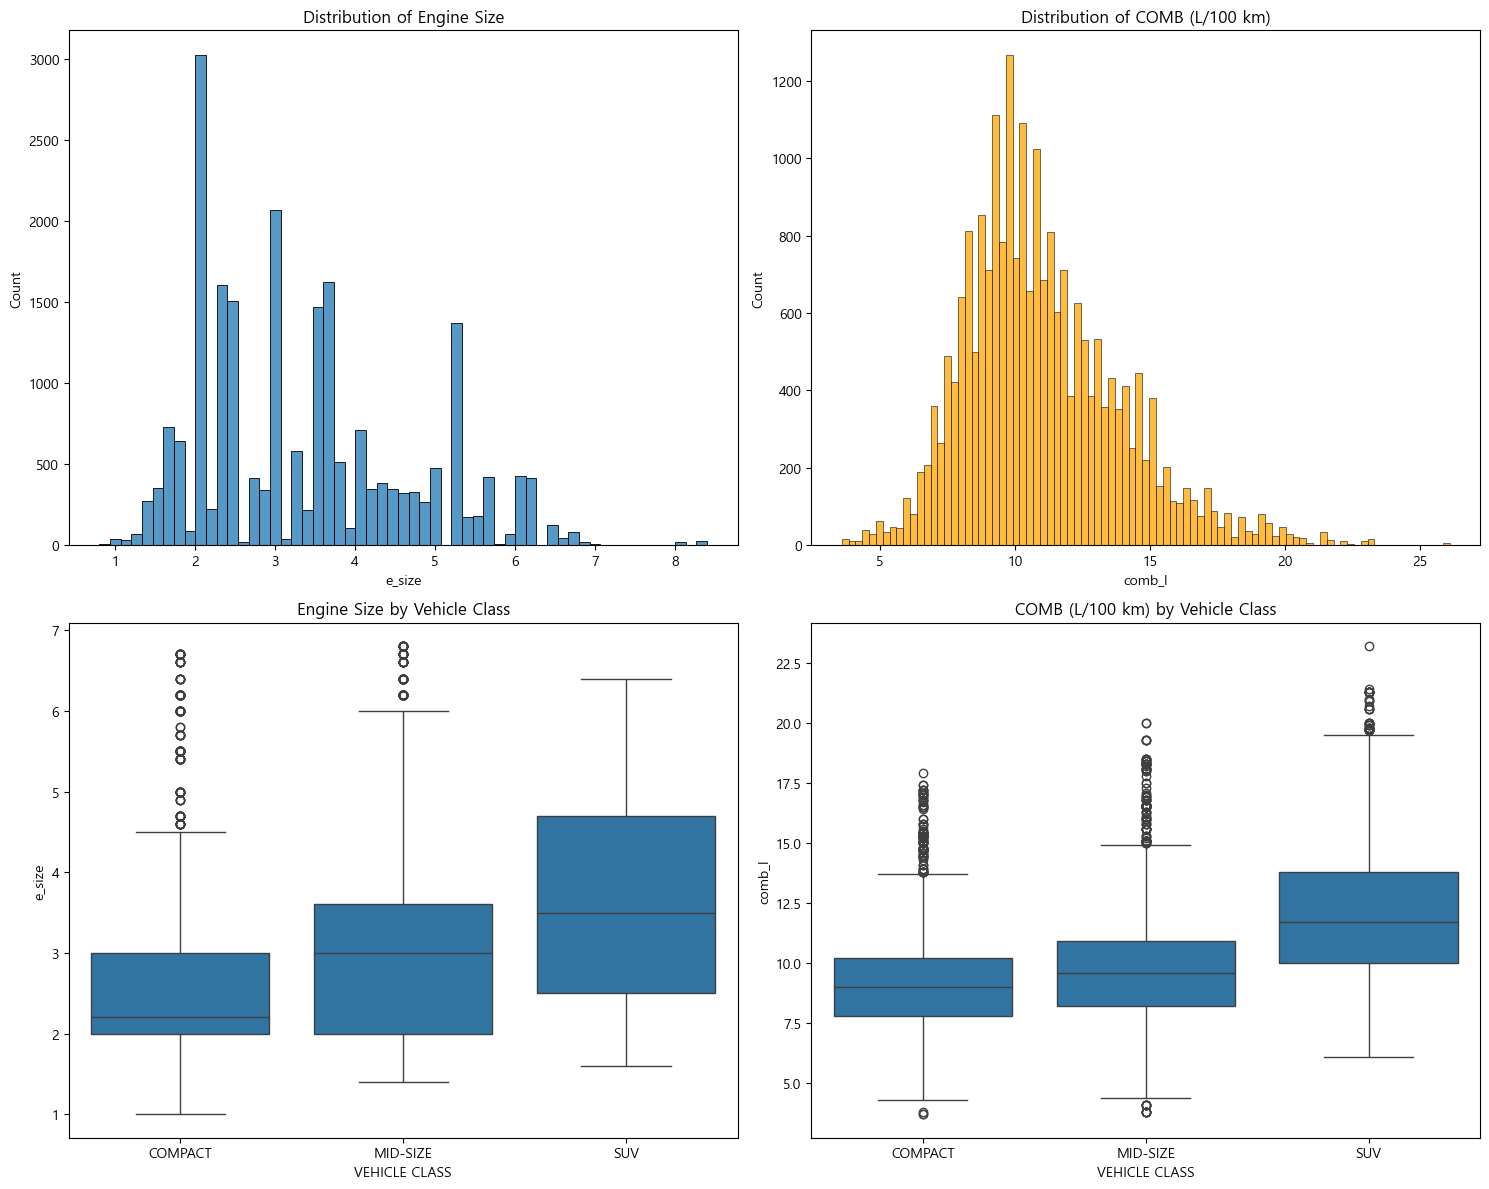

------------------------------


,e_size,comb_l
,std,std
VEHICLE CLASS,,
COMPACT,1.08,2.06
MID-SIZE,1.19,2.40
SUV,1.20,2.71


엔진 사이즈나 연비 모두 right skew된 모습을 보인다.
엔진 크기의 변동계수가 더 큰 모습이지만 IQR 이상치는 연비가 훨씬 많다.
iqr 이상치 개수를 보면, 엔진 사이즈는 어느정도 규격이 있는 모습이지만, 연비의 경우 차종에 따라 우측 꼬리로 
길게 이어진 수치들이 존재한다는 것을 알 수 있음.
엔진 사이즈 히스토그램을 보아도, 특정 막대 구간들에서 길게 뻗은 것을 보아
일정 규격이 존재하는 것으로 보임.


In [43]:
df_rename = df.rename(columns={'ENGINE SIZE':'e_size', 'COMB (L/100 km)': 'comb_l'})

# TODO 1: 두 변수의 산포 측도 계산
df_pick = df_rename[['e_size', 'comb_l']]
df_pick.head()

print('-'*30)
# [수정] 아래 두 줄은 'e_size'가 아니라 'comb_l' 계산이어야 해서 고쳤습니다!
print(f"엔진 크기 분산: {df_pick['e_size'].var():.2f}")
print(f"연비 분산: {df_pick['comb_l'].var():.2f}")        # <--- e_size -> comb_l 수정
print(f"엔진 크기 표준편차: {df_pick['e_size'].std():.2f}")
print(f"연비 표준편차: {df_pick['comb_l'].std():.2f}")    # <--- e_size -> comb_l 수정

print(f"엔진 크기 범위: {df_pick['e_size'].max()-df_pick['e_size'].min():.2f}")
print(f"연비 범위: {df_pick['comb_l'].max()-df_pick['comb_l'].min():.2f}")

# Quantile 계산
e_size_Q1 = df_pick['e_size'].quantile(0.25)
comb_l_Q1 = df_pick['comb_l'].quantile(0.25)
e_size_Q2 = df_pick['e_size'].quantile(0.5)
comb_l_Q2 = df_pick['comb_l'].quantile(0.5)
e_size_Q3 = df_pick['e_size'].quantile(0.75)
comb_l_Q3 = df_pick['comb_l'].quantile(0.75)

print(f"엔진 크기 Q1: {e_size_Q1}")
print(f"연비 Q1: {comb_l_Q1}")
print(f"엔진 크기 Q2: {e_size_Q2}")
print(f"연비 Q2: {comb_l_Q2}")
print(f"엔진 크기 Q3: {e_size_Q3}")
print(f"연비 Q3: {comb_l_Q3}")
print(f"엔진 크기 IQR: {e_size_Q3-e_size_Q1:.2f}")
print(f"연비 IQR: {comb_l_Q3-comb_l_Q1:.2f}")

# TODO 2: 변동계수(CV) 계산
print('-'*30)
print("CV = STD / MEAN")
def cv(data):
    return (data.std() / data.mean()) * 100 # %출력
print(f"엔진 크기 CV: {cv(df_pick['e_size']):.2f}")
print(f"연비      CV: {cv(df_pick['comb_l']):.2f}")

# TODO 3: 이상치 탐지 (IQR)
print('-'*30)

# 1. ENGINE SIZE (e_size) 이상치 탐지
e_size_IQR = e_size_Q3 - e_size_Q1
e_size_iqr_lower = e_size_Q1 - 1.5 * e_size_IQR
e_size_iqr_upper = e_size_Q3 + 1.5 * e_size_IQR

e_size_series = df_pick['e_size']
e_size_iqr_outliers = e_size_series[(e_size_series < e_size_iqr_lower) | (e_size_series > e_size_iqr_upper)]

print(f"엔진 크기 IQR 이상치 개수: {len(e_size_iqr_outliers)}")

comb_l_IQR = comb_l_Q3 - comb_l_Q1
comb_l_iqr_lower = comb_l_Q1 - 1.5 * comb_l_IQR
comb_l_iqr_upper = comb_l_Q3 + 1.5 * comb_l_IQR

comb_l_series = df_pick['comb_l']
comb_l_iqr_outliers = comb_l_series[(comb_l_series < comb_l_iqr_lower) | (comb_l_series > comb_l_iqr_upper)]

print(f"연비 IQR 이상치 개수: {len(comb_l_iqr_outliers)}")

# TODO 4: 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
# -> e_size, comb_l의 히스토그램 + 차량등급별 박스플롯

# 2x2 서브플롯 설정 (크기 지정)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. 첫 번째 히스토그램: Engine Size
sns.histplot(data=df_rename, x='e_size', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Engine Size')

# 2. 두 번째 히스토그램: Fuel Consumption (comb_l)
sns.histplot(data=df_rename, x='comb_l', color='orange', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of COMB (L/100 km)')

# 차량 등급 필터링 (COMPACT, MID-SIZE, SUV)
target_classes = ['COMPACT', 'MID-SIZE', 'SUV']
df_target = df_rename[df_rename['VEHICLE CLASS'].isin(target_classes)]

# 3. 첫 번째 박스플롯: 차량등급별 Engine Size
# order 파라미터로 출력 순서를 지정할 수도 있습니다.
sns.boxplot(data=df_target, x='VEHICLE CLASS', y='e_size', ax=axes[1, 0])
axes[1, 0].set_title('Engine Size by Vehicle Class')

# 4. 두 번째 박스플롯: 차량등급별 comb
sns.boxplot(data=df_target, x='VEHICLE CLASS', y='comb_l', ax=axes[1, 1])
axes[1, 1].set_title('COMB (L/100 km) by Vehicle Class')

plt.tight_layout()
plt.show()

# TODO 5: 차량등급별(COMPACT, MID-SIZE, SUV) 표준편차 비교
print("-"*30)

std_df = df_target.groupby('VEHICLE CLASS').agg({
    'e_size': ['std'],
    'comb_l': ['std']
}).round(2)
display(std_df)

# TODO 6: 결과 해석
print(f"엔진 사이즈나 연비 모두 right skew된 모습을 보인다.")
print(f"엔진 크기의 변동계수가 더 큰 모습이지만 IQR 이상치는 연비가 훨씬 많다.")
print(f"iqr 이상치 개수를 보면, 엔진 사이즈는 어느정도 규격이 있는 모습이지만, 연비의 경우 차종에 따라 우측 꼬리로 \n길게 이어진 수치들이 존재한다는 것을 알 수 있음.")
print(f"엔진 사이즈 히스토그램을 보아도, 특정 막대 구간들에서 길게 뻗은 것을 보아\n일정 규격이 존재하는 것으로 보임.")

---

## 📝 실습 문제 3: 분포의 형태 (왜도, 첨도)

### 배경
4가지 수치형 변수의 **왜도와 첨도**를 분석하여 분포 형태를 파악합니다.

### 이론 복습

**왜도**
| 왜도 | 의미 | 평균 vs 중앙값 |
|------|------|---------------|
| = 0 | 대칭 | 평균 ≈ 중앙값 |
| > 0 | 오른쪽 꼬리 | 평균 > 중앙값 |
| < 0 | 왼쪽 꼬리 | 평균 < 중앙값 |


**초과 첨도**
| 첨도 | 의미 |
|------|------|
| = 0 | 정규분포와 동일 |
| > 0 | 꼬리 두꺼움 (극단값 많음) |
| < 0 | 꼬리 얇음 (극단값 적음) |

### 수행할 작업
1. 4개 변수의 왜도/첨도 계산: ENGINE SIZE, COMB (L/100 km), COMB (mpg), EMISSIONS
2. 결과를 DataFrame으로 정리 (왜도/첨도 해석 컬럼 포함)
3. 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시)
    - 각 그래프에 평균(빨강)과 중앙값(초록) 수직선 표시
4. 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
5. 결과 해석

['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

,YEAR,MAKE,MODEL,VEHICLE CLASS,e_size,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),comb_l,comb_m,emis
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175


            skew  kurtosis
e_size  0.631264 -0.394947
comb_l  0.817065  1.054642
comb_m  1.172800  3.643618
emis    0.534641  0.615430


,skew,kurtosis,왜도 해석,첨도 해석
e_size,0.631264,-0.394947,오른쪽 꼬리,꼬리 얇음
comb_l,0.817065,1.054642,오른쪽 꼬리,꼬리 두꺼움
comb_m,1.172800,3.643618,오른쪽 꼬리,꼬리 두꺼움
emis,0.534641,0.615430,오른쪽 꼬리,꼬리 두꺼움


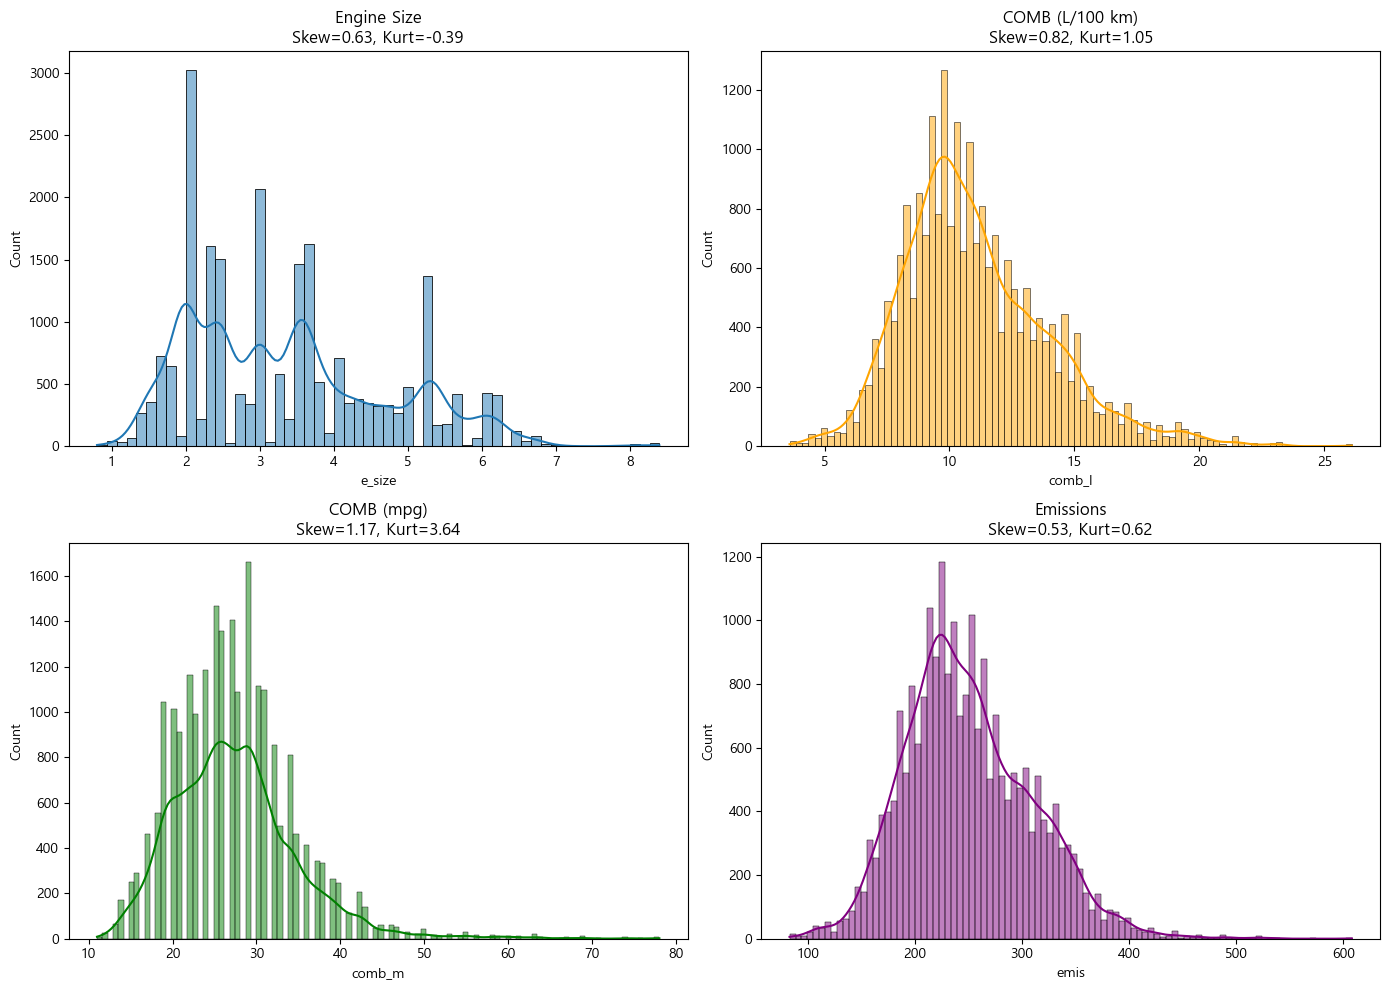

,FUEL,skew,kurtosis
0,D,-0.367713,-1.042831
1,E,-0.189320,-0.256257
2,N,-1.851785,3.071255
3,X,0.330538,-0.292857
4,Z,0.997177,1.607523


양의 왜도 시각화 그래프를 보았을 때, 대부분의 차량은 평균적인 배출량을 가지지만, 
일부 차량들이 평균을 끌어올리고 있음
z연료의 경우 왜도와 첨도가 모두 높은 것으로 보아, 배출량 편차가 크면서 높은 배출량을 가진 모델들이
다수 존재함을 알 수 있음


In [48]:
numeric_cols = ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']
display(numeric_cols)
# 특정 컬럼만 변경
df_re = df.rename(columns={
    'ENGINE SIZE': 'e_size', 
    'COMB (L/100 km)': 'comb_l',
    'COMB (mpg)' : 'comb_m',
    'EMISSIONS' : 'emis'
}, inplace=False)
display(df_re.head(2))
new_cols = ['e_size', 'comb_l', 'comb_m', 'emis']
# TODO 1: 왜도/첨도 계산
result_df = df_re[new_cols].agg(['skew', 'kurtosis']).transpose()
print(result_df)
# TODO 2: 결과 DataFrame 정리 (왜도/첨도 해석 컬럼 포함)
# 왜도 해석
result_df['왜도 해석'] = np.where(
    result_df['skew'] > 0, '오른쪽 꼬리',
    np.where(result_df['skew'] < 0, '왼쪽 꼬리', '대칭')
)
# 첨도 해석
result_df['첨도 해석'] = np.where(
    result_df['kurtosis'] > 0, '꼬리 두꺼움',
    np.where(result_df['kurtosis'] < 0, '꼬리 얇음', '정규분포')
)
display(result_df)
# TODO 3: 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시, 평균/중앙값 수직선)

# 2x2 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. 첫 번째 그래프: e_size
col = 'e_size'
ax = axes[0, 0]

sns.histplot(data=df_re, x=col, kde=True, ax=ax)

skew_val = result_df.loc[col, 'skew']
kurt_val = result_df.loc[col, 'kurtosis']

ax.set_title(f"Engine Size\nSkew={skew_val:.2f}, Kurt={kurt_val:.2f}")

# 2. 두 번째 그래프: comb_l
col = 'comb_l'
ax = axes[0, 1]

sns.histplot(data=df_re, x=col, kde=True, color='orange', ax=ax)

skew_val = result_df.loc[col, 'skew']
kurt_val = result_df.loc[col, 'kurtosis']

ax.set_title(f"COMB (L/100 km)\nSkew={skew_val:.2f}, Kurt={kurt_val:.2f}")

# 3. 세 번째 그래프: comb_m
col = 'comb_m'
ax = axes[1, 0]

sns.histplot(data=df_re, x=col, kde=True, color='green', ax=ax)

skew_val = result_df.loc[col, 'skew']
kurt_val = result_df.loc[col, 'kurtosis']

ax.set_title(f"COMB (mpg)\nSkew={skew_val:.2f}, Kurt={kurt_val:.2f}")

# 4. 네 번째 그래프: emis
col = 'emis'
ax = axes[1, 1]

sns.histplot(data=df_re, x=col, kde=True, color='purple', ax=ax)

skew_val = result_df.loc[col, 'skew']
kurt_val = result_df.loc[col, 'kurtosis']

ax.set_title(f"Emissions\nSkew={skew_val:.2f}, Kurt={kurt_val:.2f}")

plt.tight_layout()
plt.show()
# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
# apply를 사용하여 명시적으로 호출
# 문자열 'kurtosis' 대신 pd.Series.kurt 함수 객체를 직접 전달
# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교

# 1. apply를 쓰면 각 그룹이 'DataFrame/Series' 상태로 넘어옵니다.
# 2. DataFrame/Series 상태에서는 .agg(['skew', 'kurtosis'])가 완벽하게 작동합니다!
# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교

fuel_stats = df_re.groupby('FUEL')['emis'].apply(
    lambda x: pd.Series({'skew': x.skew(), 'kurtosis': x.kurtosis()})
).unstack().reset_index()

# 깔끔하게 출력
display(fuel_stats)

# TODO 5: 결과 해석
print("양의 왜도 시각화 그래프를 보았을 때, 대부분의 차량은 평균적인 배출량을 가지지만, \n일부 차량들이 평균을 끌어올리고 있음")
print("z연료의 경우 왜도와 첨도가 모두 높은 것으로 보아, 배출량 편차가 크면서 높은 배출량을 가진 모델들이\n다수 존재함을 알 수 있음")


---

## 🏆 도전 과제: 라이브러리 없이 기술통계 직접 구현

numpy, scipy 없이 **순수 Python**으로 기술통계 함수를 구현합니다.

### 규칙
- `math.sqrt`만 사용 가능
- 내장 함수 `sum()`, `len()`, `sorted()`, `min()`, `max()` 사용 가능

### 구현할 함수

| 함수 | 설명 |
|------|------|
| `my_mean(data)` | 산술평균 |
| `my_trimmed_mean(data, proportion)` | 절사평균 (양쪽 proportion 비율 제거) |
| `my_weighted_mean(data, weights)` | 가중평균 |
| `my_median(data)` | 중앙값 |
| `my_mode(data)` | 최빈값 |
| `my_variance(data, ddof=0)` | 분산 (ddof=0: 모분산, ddof=1: 표본분산) |
| `my_std(data, ddof=0)` | 표준편차 |
| `my_percentile(data, q)` | 퍼센타일 (Nearest Rank 방식) |
| `my_iqr(data)` | 사분위범위 (Q3 - Q1) |

In [45]:
import math


def my_mean(data):
    """
    산술평균: 합계 / 개수
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        산술평균 값
    
    Examples
    --------
    >>> my_mean([1, 2, 3, 4, 5])
    3.0
    >>> my_mean([10, 20, 30])
    20.0
    """
    pass


def my_trimmed_mean(data, proportion):
    """
    절사평균: 양쪽 끝에서 일정 비율을 제거한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    proportion : float
        제거할 비율 (0 ~ 0.5 미만)
        - 0.1이면 양쪽에서 각각 10%씩 제거 (총 20% 제거)
        - 0.25이면 양쪽에서 각각 25%씩 제거 (총 50% 제거)
    
    Returns
    -------
    float
        절사평균 값
    
    Notes
    -----
    - proportion이 0이면 산술평균과 동일
    - proportion이 0.5에 가까우면 중앙값에 가까워짐
    - 이상치에 민감한 산술평균의 단점을 보완
    
    Examples
    --------
    >>> my_trimmed_mean([1, 2, 3, 4, 100], 0.2)  # 양쪽 1개씩 제거
    3.0  # [2, 3, 4]의 평균
    >>> my_trimmed_mean([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 0.1)  # 양쪽 1개씩 제거
    5.5  # [2, 3, 4, 5, 6, 7, 8, 9]의 평균
    """
    pass


def my_weighted_mean(data, weights):
    """
    가중평균: 각 값에 가중치를 곱한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    weights : list
        가중치 리스트 (data와 길이가 같아야 함)
    
    Returns
    -------
    float
        가중평균 값
    
    Notes
    -----
    - 가중치의 합이 1이 아니어도 됨 (내부에서 정규화)
    - 모든 가중치가 같으면 산술평균과 동일
    
    Examples
    --------
    >>> my_weighted_mean([80, 90, 70], [3, 3, 2])  # 학점 계산
    80.0  # (80*3 + 90*3 + 70*2) / (3+3+2)
    >>> my_weighted_mean([100, 200], [1, 1])  # 동일 가중치
    150.0  # 산술평균과 동일
    """
    pass


def my_median(data):
    """
    중앙값: 정렬 후 가운데 값 (짝수면 두 값의 평균)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        중앙값
    
    Examples
    --------
    >>> my_median([1, 3, 5])  # 홀수 개
    3.0
    >>> my_median([1, 2, 3, 4])  # 짝수 개
    2.5  # (2 + 3) / 2
    """
    pass


def my_mode(data):
    """
    최빈값: 가장 빈번한 값
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    int or float
        가장 빈번하게 등장하는 값 (동률이면 먼저 나온 값)
    
    Examples
    --------
    >>> my_mode([1, 2, 2, 3, 3, 3])
    3
    >>> my_mode([1, 1, 2, 2])  # 동률: 먼저 나온 1 반환
    1
    """
    pass


def my_variance(data, ddof=0):
    """
    분산: 편차 제곱의 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (Delta Degrees of Freedom)
        - ddof=0: 모분산 (N으로 나눔)
        - ddof=1: 표본분산 (N-1로 나눔, 베셀 보정)
    
    Returns
    -------
    float
        분산 값
    
    Examples
    --------
    >>> my_variance([1, 2, 3, 4, 5], ddof=0)  # 모분산
    2.0
    >>> my_variance([1, 2, 3, 4, 5], ddof=1)  # 표본분산
    2.5
    """
    pass


def my_std(data, ddof=0):
    """
    표준편차: 분산의 제곱근
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (my_variance와 동일)
    
    Returns
    -------
    float
        표준편차 값
    
    Examples
    --------
    >>> my_std([1, 2, 3, 4, 5], ddof=0)  # 모표준편차
    1.4142...
    >>> my_std([1, 2, 3, 4, 5], ddof=1)  # 표본표준편차
    1.5811...
    """
    pass


def my_percentile(data, q):
    """
    q번째 퍼센타일 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    q : float
        퍼센타일 값 (0 ~ 100)
    
    Returns
    -------
    float
        q번째 퍼센타일 값 (실제 데이터 중 하나)
    
    Notes
    -----
    - Nearest Rank 방식: 계산된 위치에서 가장 가까운 인덱스의 실제 값 반환
    - q=0: 최솟값, q=100: 최댓값, q=50: 중앙값 근사
    
    Examples
    --------
    >>> my_percentile([1, 2, 3, 4, 5], 0)
    1  # 최솟값
    >>> my_percentile([1, 2, 3, 4, 5], 50)
    3  # 중앙 위치 값
    >>> my_percentile([1, 2, 3, 4, 5], 100)
    5  # 최댓값
    >>> my_percentile([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 25)
    30  # 인덱스 round(9 * 0.25) = 2 → 30
    """
    pass


def my_iqr(data):
    """
    사분위범위(IQR): Q3 - Q1 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        IQR 값 (75번째 퍼센타일 - 25번째 퍼센타일)
    
    Examples
    --------
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7])  # 인덱스: 0~6
    4.0  # Q3(인덱스 5→6) - Q1(인덱스 2→2) = 6 - 2 = 4
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    5.0  # Q3(8) - Q1(3) = 5
    """
    pass

In [46]:
# 검증 코드
import numpy as np
from scipy import stats

print("\n" + "="*60)
print("검증 결과")
print("="*60)

# 테스트 데이터
test_data = [4, 7, 2, 9, 1, 5, 3, 8, 6, 5]
test_odd = [3, 1, 4, 1, 5]
test_single = [42]
test_same = [7, 7, 7, 7, 7]
test_negative = [-5, -2, 0, 3, 7]
test_outlier = [1, 2, 3, 4, 100]

all_pass = True
total = 0
passed = 0

def check(name, mine, expected, tol=0.001):
    global all_pass, total, passed
    total += 1
    if mine is None:
        print(f"  ❌ {name}: 미구현")
        all_pass = False
    else:
        try:
            match = abs(float(mine) - float(expected)) < tol
            if match:
                passed += 1
                print(f"  ✅ {name}: {float(mine):.4f}")
            else:
                all_pass = False
                print(f"  ❌ {name}: {float(mine):.4f} (정답: {float(expected):.4f})")
        except:
            all_pass = False
            print(f"  ❌ {name}: 오류 발생")

# 1. 산술평균
print("\n[my_mean]")
check("기본 데이터", my_mean(test_data), np.mean(test_data))
check("홀수 개", my_mean(test_odd), np.mean(test_odd))
check("단일 값", my_mean(test_single), np.mean(test_single))
check("음수 포함", my_mean(test_negative), np.mean(test_negative))

# 2. 절사평균
print("\n[my_trimmed_mean]")
check("20% 절사", my_trimmed_mean(test_outlier, 0.2), stats.trim_mean(test_outlier, 0.2))
check("10% 절사", my_trimmed_mean(test_data, 0.1), stats.trim_mean(test_data, 0.1))
check("0% 절사", my_trimmed_mean(test_data, 0), stats.trim_mean(test_data, 0))

# 3. 가중평균
print("\n[my_weighted_mean]")
check("학점 계산", my_weighted_mean([80, 90, 70], [3, 3, 2]), np.average([80, 90, 70], weights=[3, 3, 2]))
check("동일 가중치", my_weighted_mean([100, 200], [1, 1]), np.average([100, 200], weights=[1, 1]))
check("가중치 다름", my_weighted_mean([10, 20, 30], [1, 2, 3]), np.average([10, 20, 30], weights=[1, 2, 3]))

# 4. 중앙값
print("\n[my_median]")
check("짝수 개", my_median(test_data), np.median(test_data))
check("홀수 개", my_median(test_odd), np.median(test_odd))
check("단일 값", my_median(test_single), np.median(test_single))
check("음수 포함", my_median(test_negative), np.median(test_negative))

# 5. 최빈값
print("\n[my_mode]")
check("기본 (5가 2번)", my_mode(test_data), stats.mode(test_data, keepdims=False).mode)
check("홀수 (1이 2번)", my_mode(test_odd), stats.mode(test_odd, keepdims=False).mode)
check("동일 값", my_mode(test_same), stats.mode(test_same, keepdims=False).mode)

# 6. 분산
print("\n[my_variance]")
check("모분산 (ddof=0)", my_variance(test_data, 0), np.var(test_data, ddof=0))
check("표본분산 (ddof=1)", my_variance(test_data, 1), np.var(test_data, ddof=1))
check("동일 값 → 0", my_variance(test_same, 0), np.var(test_same, ddof=0))

# 7. 표준편차
print("\n[my_std]")
check("모표준편차", my_std(test_data, 0), np.std(test_data, ddof=0))
check("표본표준편차", my_std(test_data, 1), np.std(test_data, ddof=1))
check("동일 값 → 0", my_std(test_same, 0), np.std(test_same, ddof=0))

# 8. 퍼센타일 (Nearest Rank 방식)
# 주의: numpy는 선형보간 사용, Nearest Rank는 직접 계산
print("\n[my_percentile] - Nearest Rank 방식")
sorted_test = sorted(test_data)  # [1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
check("0% (최솟값)", my_percentile(test_data, 0), min(test_data))
check("50% (중앙값)", my_percentile(test_data, 50), sorted_test[round((len(test_data)-1) * 0.5)])
check("100% (최댓값)", my_percentile(test_data, 100), max(test_data))
# 25%, 75%는 Nearest Rank 방식으로 직접 계산
check("25%", my_percentile(test_data, 25), sorted_test[round((len(test_data)-1) * 0.25)])
check("75%", my_percentile(test_data, 75), sorted_test[round((len(test_data)-1) * 0.75)])

# 9. IQR (Nearest Rank 기준)
print("\n[my_iqr]")
expected_iqr = sorted_test[round((len(test_data)-1) * 0.75)] - sorted_test[round((len(test_data)-1) * 0.25)]
check("기본 데이터", my_iqr(test_data), expected_iqr)
check("동일 값 → 0", my_iqr(test_same), 0)

# 최종 결과
print("\n" + "="*60)
print(f"결과: {passed}/{total} 통과 ({passed/total*100:.0f}%)")
print("="*60)
if all_pass:
    print("🎉 모든 테스트 통과!")
else:
    print("⚠️ 일부 테스트 실패 - 로직을 확인하세요")


검증 결과

[my_mean]
  ❌ 기본 데이터: 미구현
  ❌ 홀수 개: 미구현
  ❌ 단일 값: 미구현
  ❌ 음수 포함: 미구현

[my_trimmed_mean]
  ❌ 20% 절사: 미구현
  ❌ 10% 절사: 미구현
  ❌ 0% 절사: 미구현

[my_weighted_mean]
  ❌ 학점 계산: 미구현
  ❌ 동일 가중치: 미구현
  ❌ 가중치 다름: 미구현

[my_median]
  ❌ 짝수 개: 미구현
  ❌ 홀수 개: 미구현
  ❌ 단일 값: 미구현
  ❌ 음수 포함: 미구현

[my_mode]
  ❌ 기본 (5가 2번): 미구현
  ❌ 홀수 (1이 2번): 미구현
  ❌ 동일 값: 미구현

[my_variance]
  ❌ 모분산 (ddof=0): 미구현
  ❌ 표본분산 (ddof=1): 미구현
  ❌ 동일 값 → 0: 미구현

[my_std]
  ❌ 모표준편차: 미구현
  ❌ 표본표준편차: 미구현
  ❌ 동일 값 → 0: 미구현

[my_percentile] - Nearest Rank 방식
  ❌ 0% (최솟값): 미구현
  ❌ 50% (중앙값): 미구현
  ❌ 100% (최댓값): 미구현
  ❌ 25%: 미구현
  ❌ 75%: 미구현

[my_iqr]
  ❌ 기본 데이터: 미구현
  ❌ 동일 값 → 0: 미구현

결과: 0/30 통과 (0%)
⚠️ 일부 테스트 실패 - 로직을 확인하세요
